In [ ]:
import pandas as pd
import numpy as np
path= r"C:\Users\DELL\Desktop\ml\books publish papers\Heart_Disease_Prediction.csv"
df=pd.read_csv(path)
print(df.head())
df.columns=df.columns.str.replace(' ','_')

df['Heart_Disease'].value_counts(normalize=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']

y = y.map({'Absence': 0, 'Presence': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

os.environ['TF_DETERMINISTIC_OPS'] = '1'
tf.config.set_visible_devices([], 'GPU')
tf.config.experimental.enable_op_determinism()

model1 = Sequential()
model1.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model1.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=51,
                    batch_size=16,
                    verbose=1)

loss, accuracy = model1.evaluate(X_test, y_test)
print(f"Test Accuracy with ANN: {accuracy*100:.2f}%")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np


X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)


model2 = Sequential()


model2.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model2.add(MaxPooling1D(pool_size=2))


model2.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))

model2.add(Flatten())  

model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='sigmoid'))


model2.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model2.fit(X_train_cnn, y_train,
                    validation_data=(X_test_cnn, y_test),
                    epochs=50,
                    batch_size=16,
                    verbose=1)


loss, accuracy = model2.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy with CNN: {accuracy*100:.2f}%")

import tensorflow as tf
import numpy as np
import random
import os

seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


os.environ['TF_DETERMINISTIC_OPS'] = '1'


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


model3 = Sequential()


model3.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))


model3.add(Dense(32, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))


model3.add(Dense(16, activation='relu'))
model3.add(BatchNormalization())


model3.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.001)  
model3.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model3.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=16,
                    callbacks=[early_stop],
                    verbose=1)


loss, accuracy = model3.evaluate(X_test, y_test)
print(f"Test Accuracy with Improved FNN: {accuracy*100:.2f}%")





   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6360 - loss: 0.6207 - val_accuracy: 0.6667 - val_loss: 0.5905
Epoch 2/51
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7596 - loss: 0.5569 - val_accuracy: 0.7593 - val_loss: 0.5413
Epoch 3/51
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8150 - loss: 0.5053 - val_accuracy: 0.7778 - val_loss: 0.5030
Epoch 4/51
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8377 - loss: 0.4611 - val_accuracy: 0.7778 - val_loss: 0.4735
Epoch 5/51
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8569 - loss: 0.4226 - val_accuracy: 0.7778 - val_loss: 0.4505
Epoch 6/51
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8689 - loss: 0.3902 - val_accuracy: 0.7778 - val_loss: 0.4325
Epoch 7/51
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8631 - loss: 0.3625 - val_accuracy: 0.7963 - val_loss: 0.4199
Epoch 8/51
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8691 - loss: 0.3409 - val_accuracy: 0.8148 - val_loss: 0.4120
Ep

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6049 - loss: 0.6725 - val_accuracy: 0.7222 - val_loss: 0.6361
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7007 - loss: 0.6162 - val_accuracy: 0.7407 - val_loss: 0.5990
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7586 - loss: 0.5726 - val_accuracy: 0.7593 - val_loss: 0.5575
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7872 - loss: 0.5264 - val_accuracy: 0.7222 - val_loss: 0.5315
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7737 - loss: 0.4963 - val_accuracy: 0.7407 - val_loss: 0.5210
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8128 - loss: 0.4614 - val_accuracy: 0.7593 - val_loss: 0.5267
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7825 - loss: 0.4417 - val_accuracy: 0.7593 - val_loss: 0.5281
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8010 - loss: 0.4369 - val_accuracy: 0.7593 - val_loss: 0.5291
E

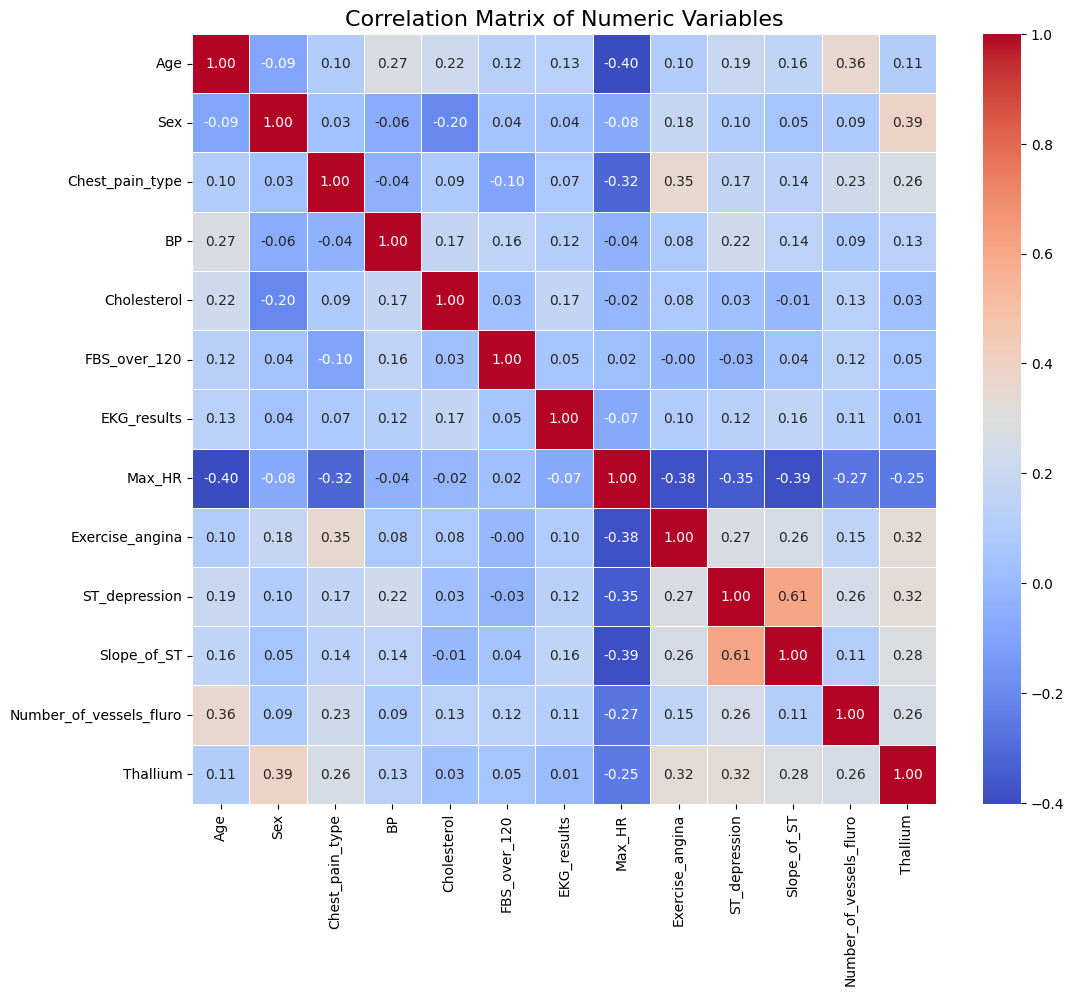

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_vars = [
    'Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol', 'FBS_over_120',
    'EKG_results', 'Max_HR', 'Exercise_angina', 'ST_depression',
    'Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium'
]


correlation_matrix = df[numeric_vars].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables', fontsize=16)
plt.show()


In [3]:
def predict_heart_disease(**kwargs):
    feature_order = [
        'Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol',
        'FBS_over_120', 'EKG_results', 'Max_HR', 'Exercise_angina',
        'ST_depression', 'Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium'
    ]
    
    default_values = {
        'Age': 48.0, 'Sex': 0.0, 'Chest_pain_type': 3.0, 'BP': 120.0,
        'Cholesterol': 213.0, 'FBS_over_120': 0.0, 'EKG_results': 0.0,
        'Max_HR': 133.0, 'Exercise_angina': 0.0, 'ST_depression': 0.0,
        'Slope_of_ST': 1.0, 'Number_of_vessels_fluro': 0.0, 'Thallium': 3.0
    }
    
    input_values = np.array([default_values[col] for col in feature_order]).reshape(1, -1)
    
    for param, value in kwargs.items():
        norm_param = param.replace(' ', '_')
        if norm_param in feature_order:
            idx = feature_order.index(norm_param)
            input_values[0, idx] = value
        else:
            raise ValueError(f"Unknown parameter '{param}'. Valid parameters: {feature_order}")
    
    input_scaled = scaler.transform(input_values)
    
    prob_present = model3.predict(input_scaled, verbose=0)[0][0]
    prob_absent = 1 - prob_present
    
    print("\nInput Features Used:")
    for name, val in zip(feature_order, input_values[0]):
        print(f"{name}: {val}")
    
    print("\nPrediction Probabilities:")
    print(f"Heart Disease Present: {prob_present*100:.2f}%")
    print(f"Heart Disease Absent:  {prob_absent*100:.2f}%")
    
    return {'present': prob_present, 'absent': prob_absent}
predict_heart_disease(Thallium=45)


Input Features Used:
Age: 48.0
Sex: 0.0
Chest_pain_type: 3.0
BP: 120.0
Cholesterol: 213.0
FBS_over_120: 0.0
EKG_results: 0.0
Max_HR: 133.0
Exercise_angina: 0.0
ST_depression: 0.0
Slope_of_ST: 1.0
Number_of_vessels_fluro: 0.0
Thallium: 45.0

Prediction Probabilities:
Heart Disease Present: 99.97%
Heart Disease Absent:  0.03%


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'present': 0.9996692, 'absent': 0.00033080577850341797}

In [4]:
predict_heart_disease(Age=60)
predict_heart_disease(
    Age=70,
    Sex= 1,
    Chest_pain_type= 4,
    BP= 130,
    Cholesterol= 322,
    FBS_over_120= 0,
    EKG_results=2,
    Max_HR= 109,
    Exercise_angina= 0,
    ST_depression= 2.4,
    Slope_of_ST= 2,
    Number_of_vessels_fluro= 3,
    Thallium= 3
)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Input Features Used:
Age: 60.0
Sex: 0.0
Chest_pain_type: 3.0
BP: 120.0
Cholesterol: 213.0
FBS_over_120: 0.0
EKG_results: 0.0
Max_HR: 133.0
Exercise_angina: 0.0
ST_depression: 0.0
Slope_of_ST: 1.0
Number_of_vessels_fluro: 0.0
Thallium: 3.0

Prediction Probabilities:
Heart Disease Present: 13.70%
Heart Disease Absent:  86.30%

Input Features Used:
Age: 70.0
Sex: 1.0
Chest_pain_type: 4.0
BP: 130.0
Cholesterol: 322.0
FBS_over_120: 0.0
EKG_results: 2.0
Max_HR: 109.0
Exercise_angina: 0.0
ST_depression: 2.4
Slope_of_ST: 2.0
Number_of_vessels_fluro: 3.0
Thallium: 3.0

Prediction Probabilities:
Heart Disease Present: 97.64%
Heart Disease Absent:  2.36%


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'present': 0.9763599, 'absent': 0.023640096187591553}

In [5]:
import pandas as pd


path = r"C:\Users\DELL\Desktop\ml\books publish papers\Heart_Disease_Prediction.csv"
df = pd.read_csv(path)
df.columns = df.columns.str.replace(' ', '_')


default_values = df.drop('Heart_Disease', axis=1).quantile(0.25).to_dict()


print("Optimal Default Values (25th Percentile):")
for feature, value in default_values.items():
    print(f"'{feature}': {value:.1f},")


print("\nFull Statistics Verification:")
print(df.drop('Heart_Disease', axis=1).describe(percentiles=[.25, .5, .75]))

Optimal Default Values (25th Percentile):
'Age': 48.0,
'Sex': 0.0,
'Chest_pain_type': 3.0,
'BP': 120.0,
'Cholesterol': 213.0,
'FBS_over_120': 0.0,
'EKG_results': 0.0,
'Max_HR': 133.0,
'Exercise_angina': 0.0,
'ST_depression': 0.0,
'Slope_of_ST': 1.0,
'Number_of_vessels_fluro': 0.0,
'Thallium': 3.0,

Full Statistics Verification:
              Age         Sex  Chest_pain_type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.00000

PermutationExplainer explainer: 55it [00:13,  2.13it/s]                        
C:\Users\DELL\AppData\Local\Temp\ipykernel_38984\2530426559.py:11: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_df, max_display=10)


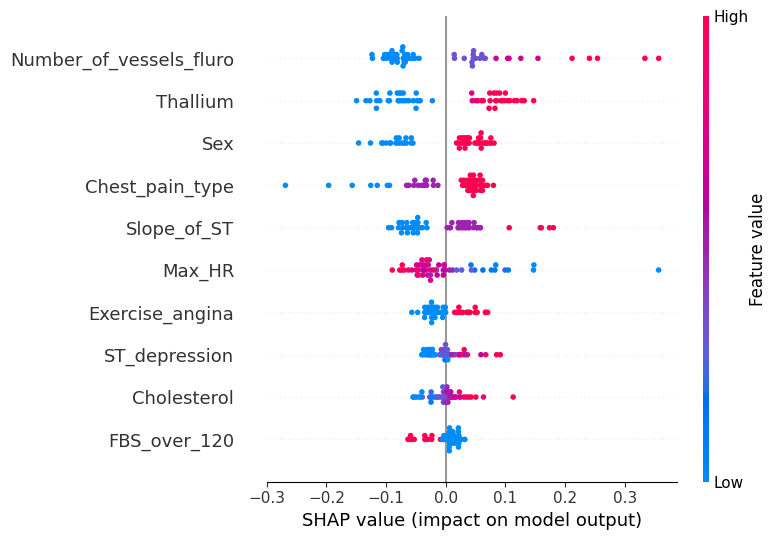

In [6]:
import shap


X_test_df = pd.DataFrame(X_test, columns=X.columns)


explainer = shap.Explainer(model3, X_test_df)
shap_values = explainer(X_test_df)


shap.summary_plot(shap_values, X_test_df, max_display=10)


Top 10 Features from Dataset (Correlation with Heart Disease):
Thallium                   0.525020
Number_of_vessels_fluro    0.455336
Exercise_angina            0.419303
Max_HR                    -0.418514
ST_depression              0.417967
Chest_pain_type            0.417436
Slope_of_ST                0.337616
Sex                        0.297721
Age                        0.212322
EKG_results                0.182091
Name: Heart_Disease, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_38984\2288472958.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_dataset_features.values, y=top10_dataset_features.index, palette="coolwarm")


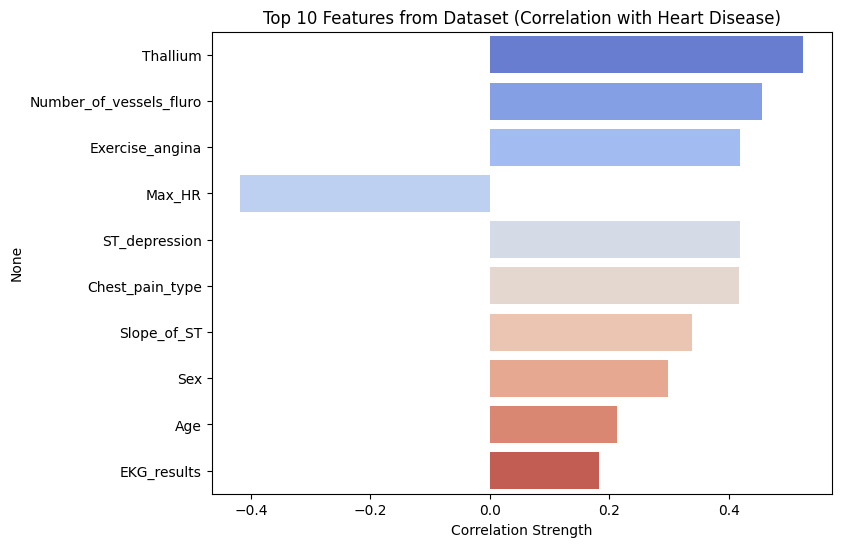

In [7]:
import matplotlib.pyplot as plt
df['Heart_Disease'] = df['Heart_Disease'].map({'Absence': 0, 'Presence': 1})


correlation = df.corr()['Heart_Disease'].drop('Heart_Disease').sort_values(key=abs, ascending=False)

top10_dataset_features = correlation.head(10)

print("Top 10 Features from Dataset (Correlation with Heart Disease):")
print(top10_dataset_features)
plt.figure(figsize=(8,6))
sns.barplot(x=top10_dataset_features.values, y=top10_dataset_features.index, palette="coolwarm")
plt.title("Top 10 Features from Dataset (Correlation with Heart Disease)")
plt.xlabel("Correlation Strength")
plt.show()


In [8]:
import numpy as np
import time

def benchmark_model(model, X_test, runs=50):
    times = []
    _ = model.predict(X_test, verbose=0)
    
    for _ in range(runs):
        start = time.time()
        _ = model.predict(X_test, verbose=0)
        end = time.time()
        times.append(end - start)
    
    avg_time = np.mean(times)
    std_time = np.std(times)
    
    return avg_time, std_time

avg_time4, std_time4 = benchmark_model(model3, X_test, runs=50)
print(f"Model3 Average Prediction Time: {avg_time4:.6f} ± {std_time4:.6f} seconds")


Model3 Average Prediction Time: 0.076210 ± 0.008121 seconds


In [9]:

import numpy as np
import time

def benchmark_model(model, X_test, runs=50):
    times = []
    
    _ = model.predict(X_test, verbose=0)
    
    for _ in range(runs):
        start = time.time()
        _ = model.predict(X_test, verbose=0)
        end = time.time()
        times.append(end - start)
    
    avg_time = np.mean(times)
    std_time = np.std(times)
    
    return avg_time, std_time



avg_time3, std_time3 = benchmark_model(model3, X_test, runs=50)
print(f"Model3 Average Prediction Time: {avg_time3:.6f} ± {std_time3:.6f} seconds")



Model3 Average Prediction Time: 0.075108 ± 0.010185 seconds


In [19]:

top10_features = [
    'Thallium',                
    'Number_of_vessels_fluro', 
    'ST_depression',
    'Max_HR',
    'Exercise_angina',
    'Slope_of_ST',
    'Chest_pain_type',                           
    'Sex', 
    'Cholesterol',                              
    'FBS_over_120',           
]
X4 = df[top10_features]
y4 = df['Heart_Disease'] 
y4 = y4.map({'Absence': 0, 'Presence': 1})  

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X4_train, X4_test, y4_train, y4_test = train_test_split(
    X4, y4, test_size=0.2, random_state=42, stratify=y4
)
scaler4 = StandardScaler()
X4_train = scaler4.fit_transform(X4_train)
X4_test = scaler4.transform(X4_test)


In [ ]:

top10_features = [
    'Thallium',                
    'Number_of_vessels_fluro', 
    'ST_depression',
    'Max_HR',
    'Exercise_angina',
    'Slope_of_ST',
    'Chest_pain_type',                           
    'Sex', 
    'Cholesterol',                              
    'FBS_over_120',           
]


X4 = df[top10_features]
y4 = df['Heart_Disease'].map({'Absence': 0, 'Presence': 1})

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X4_train, X4_test, y4_train, y4_test = train_test_split(
    X4, y4, test_size=0.2, random_state=42, stratify=y4
)
scaler4 = StandardScaler()
X4_train = scaler4.fit_transform(X4_train)
X4_test = scaler4.transform(X4_test)




In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import numpy as np
import random
import os


seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(seed_value)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'


model4 = Sequential()


model4.add(Dense(
    256, activation='relu',  
    input_shape=(X4_train.shape[1],),
    kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed_value),
    kernel_regularizer=tf.keras.regularizers.l2(0.001)  
))
model4.add(BatchNormalization())
model4.add(Dropout(0.4))  


model4.add(Dense(
    128, activation='relu', 
    kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed_value+1),
    kernel_regularizer=tf.keras.regularizers.l2(0.001)
))
model4.add(BatchNormalization())
model4.add(Dropout(0.4))


model4.add(Dense(
    64, activation='relu',  
    kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed_value+2),
    kernel_regularizer=tf.keras.regularizers.l2(0.001)
))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))

model4.add(Dense(
    32, activation='relu',
    kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed_value+3),
    kernel_regularizer=tf.keras.regularizers.l2(0.001)
))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))


model4.add(Dense(
    1, activation='sigmoid',
    kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed_value+4)
))


optimizer = Adam(
    learning_rate=0.002,  
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-7
)

model4.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall']  
)


early_stop = EarlyStopping(
    monitor='val_accuracy', 
    patience=15, 
    restore_best_weights=True,
    mode='max' 
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',  
    factor=0.7,  
    patience=8, 
    min_lr=1e-7,  
    mode='max'
)


from sklearn.utils.class_weight import compute_class_weight

unique_classes = np.unique(y4_train)
class_weights = compute_class_weight(
    'balanced',
    classes=unique_classes,
    y=y4_train.ravel()
)
class_weight_dict = dict(zip(unique_classes, class_weights))



history4 = model4.fit(
    X4_train, y4_train,
    validation_data=(X4_test, y4_test),
    epochs=100,  
    batch_size=16, 
    callbacks=[early_stop, reduce_lr],
    verbose=1,
    shuffle=True,  
    class_weight=class_weight_dict  
)


loss4, accuracy4, precision4, recall4 = model4.evaluate(X4_test, y4_test)
print(f"Test Accuracy with Model4 (Top 10 Features): {accuracy4*100:.2f}%")
print(f"Test Precision: {precision4*100:.2f}%")
print(f"Test Recall: {recall4*100:.2f}%")
print(f"F1-Score: {2*(precision4*recall4)/(precision4+recall4)*100:.2f}%")

Epoch 1/100


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\DELL\AppData\Local\Temp\ipykernel_38984\1348471685.py:101: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y=y4_train.ravel()


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5412 - loss: 1.2191 - precision: 0.4598 - recall: 0.6031 - val_accuracy: 0.8519 - val_loss: 0.9116 - val_precision: 0.7857 - val_recall: 0.9167 - learning_rate: 0.0020
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7019 - loss: 0.8624 - precision: 0.6102 - recall: 0.7597 - val_accuracy: 0.8704 - val_loss: 0.8763 - val_precision: 0.7931 - val_recall: 0.9583 - learning_rate: 0.0020
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8176 - loss: 0.7199 - precision: 0.7390 - recall: 0.8619 - val_accuracy: 0.8704 - val_loss: 0.8506 - val_precision: 0.7931 - val_recall: 0.9583 - learning_rate: 0.0020
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7923 - loss: 0.7629 - precision: 0.7000 - recall: 0.8652 - val_accuracy: 0.8519 - val_loss: 0.8382 - val_precision: 0.7857 - val_recall: 0.9167 - learning_rate: 0.0020
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7998 - loss:

In [ ]:
loss4, accuracy4, precision4, recall4 = model4.evaluate(X4_test, y4_test)


mse4 = loss4  
sensitivity4 = recall4  
f1_score4 = 2 * (precision4 * recall4) / (precision4 + recall4)


y4_pred = model4.predict(X4_test)
y4_pred_binary = (y4_pred > 0.5).astype(int)


from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y4_test, y4_pred_binary).ravel()
specificity4 = tn / (tn + fp)

print(f"Test Accuracy with Model4 (Top 10 Features): {accuracy4*100:.2f}%")
print(f"Test MSE: {mse4:.4f}")
print(f"Test F1-Score: {f1_score4:.4f}")
print(f"Test Sensitivity: {sensitivity4:.4f}")
print(f"Test Specificity: {specificity4:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8927 - loss: 0.8710 - precision: 0.8144 - recall: 0.9722
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Test Accuracy with Model4 (Top 10 Features): 87.04%
Test MSE: 0.8763
Test F1-Score: 0.8679
Test Sensitivity: 0.9583
Test Specificity: 0.8000


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


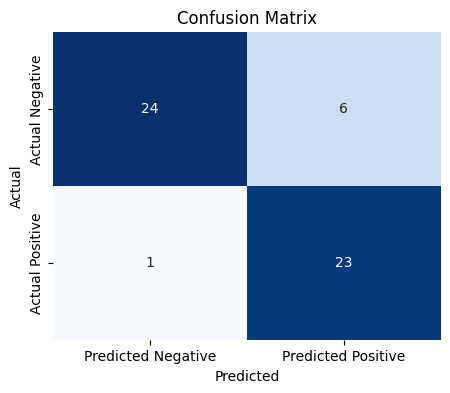

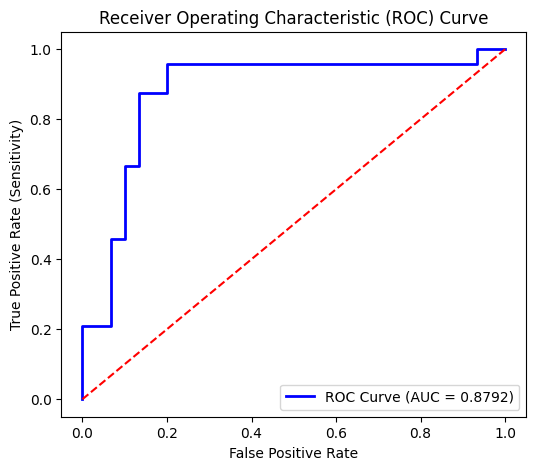

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score


y_pred_probs = model4.predict(X4_test)   
y_pred = (y_pred_probs > 0.5).astype(int)  


cm = confusion_matrix(y4_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


fpr, tpr, thresholds = roc_curve(y4_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
top10_features = [
    'Thallium',                
    'Number_of_vessels_fluro', 
    'ST_depression',
    'Max_HR',
    'Exercise_angina',
    'Slope_of_ST',
    'Chest_pain_type',                           
    'Sex', 
    'Cholesterol',                              
    'FBS_over_120',           
]
defaults = {
    'Thallium': 3,
    'Number_of_vessels_fluro': 0,
    'ST_depression': 1.0,
    'Max_HR': 150,
    'Exercise_angina': 0,
    'Slope_of_ST': 2,
    'Chest_pain_type': 1,
    'Sex': 1,
    'Cholesterol': 200,
    'FBS_over_120': 0
}

def preprocess_input(user_input, scaler, feature_order=top10_features):
    input_df = pd.DataFrame([user_input], columns=feature_order)
    scaled_input = scaler.transform(input_df)
    return scaled_input

def predict_heart_disease(scaler, model, **kwargs):
    
    user_input = defaults.copy()
    for key, value in kwargs.items():
        if key in top10_features:
            user_input[key] = value
    

    X_user = preprocess_input(user_input, scaler, top10_features)
    
    prob = model.predict(X_user)[0][0]
    heart_disease_pct = round(prob * 100, 2)
    no_disease_pct = round((1 - prob) * 100, 2)
    
    
    if prob >= 0.5:
        result = f"Heart Disease Likely ({heart_disease_pct}%) | No Disease: {no_disease_pct}%"
    else:
        result = f" No Heart Disease Likely ({no_disease_pct}%) | Disease Chance: {heart_disease_pct}%"
    
    return result

print(predict_heart_disease(
    scaler=scaler4, model=model4,
    Thallium=5, Max_HR=10, Cholesterol=200
))
print(predict_heart_disease(
    scaler=scaler4, model=model4,
    Max_HR=180  
))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Heart Disease Likely (56.59%) | No Disease: 43.41%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
 No Heart Disease Likely (69.65%) | Disease Chance: 30.35%


In [ ]:
avg_time4, std_time4 = benchmark_model(model4, X4_test, runs=50)
print(f"Model4 Average Prediction Time: {avg_time4:.6f} ± {std_time4:.6f} seconds")

Model4 Average Prediction Time: 0.070998 ± 0.007950 seconds


Evaluating all models...
ANN:
  Accuracy = 0.8148 (81.48%)
  Prediction Time = 0.0832s
------------------------------
CNN:
  Accuracy = 0.7593 (75.93%)
  Prediction Time = 0.1518s
------------------------------
FNN:
  Accuracy = 0.8889 (88.89%)
  Prediction Time = 0.0757s
------------------------------
EM Model:
  Accuracy = 0.8704 (87.04%)
  Prediction Time = 0.0722s
------------------------------


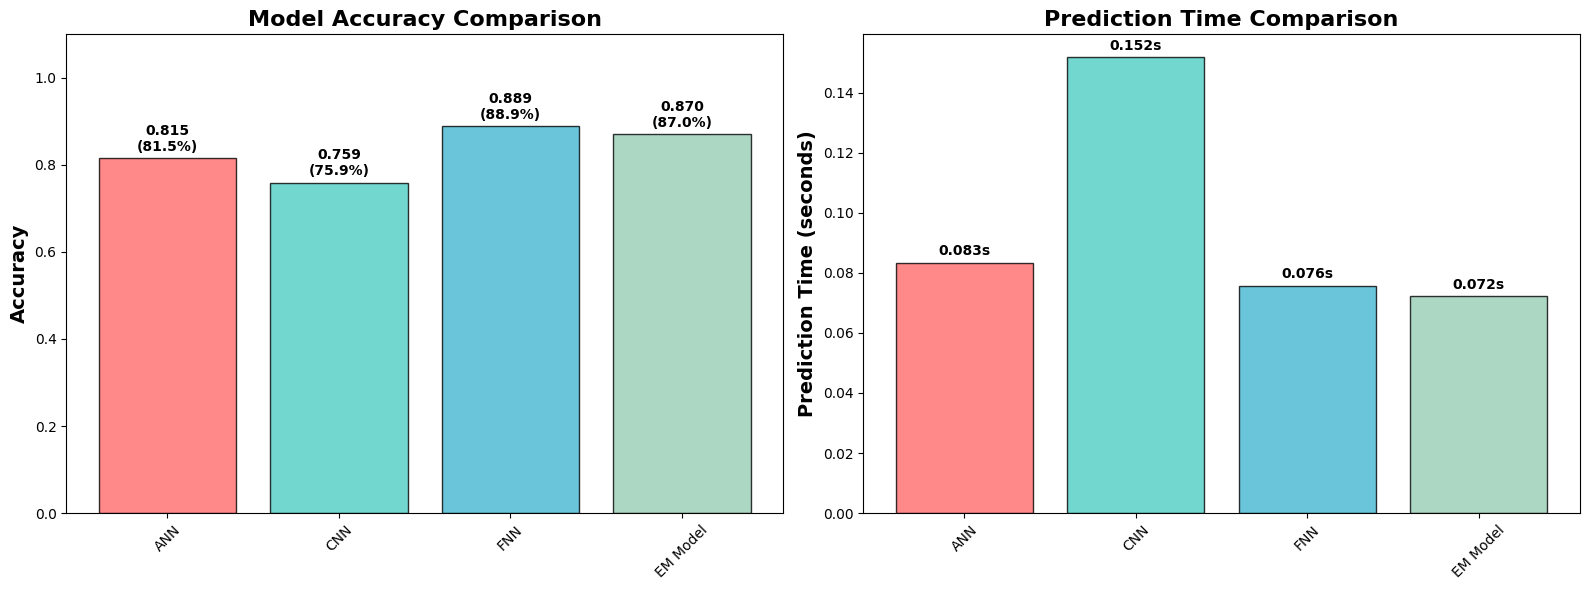


MODEL PERFORMANCE SUMMARY
   Model Accuracy Accuracy (%) Prediction Time (s) Speed Rank
     ANN   0.8148       81.48%              0.0832          4
     CNN   0.7593       75.93%              0.1518          3
     FNN   0.8889       88.89%              0.0757          1
EM Model   0.8704       87.04%              0.0722          2

Best Accuracy: FNN (88.89%)
Fastest Model: EM Model (0.0722s)
Most Accurate & Fastest: EM Model
Best Efficiency (Accuracy/Time): EM Model


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

models = {
    'ANN': model1,
    'CNN': model2,
    'FNN': model3,
    'EM Model': model4
}


test_data = {
    'ANN': (X_test, y_test),
    'CNN': (X_test_cnn, y_test),
    'FNN': (X_test, y_test),
    'EM Model': (X4_test, y4_test)
}


accuracies = []
prediction_times = []
model_names = []

print("Evaluating all models...")
print("="*50)

for name, model in models.items():
    X_test_data, y_test_data = test_data[name]
    
   
    start_time = time.time()
    
    
    if name == 'Model2 (CNN)':
    
        predictions = model.predict(X_test_data, verbose=0)
        y_pred_classes = (predictions > 0.5).astype(int)
        accuracy = np.mean(y_pred_classes.flatten() == y_test_data.values)
    else:
       
        evaluation_results = model.evaluate(X_test_data, y_test_data, verbose=0)
        
       
        if isinstance(evaluation_results, list):
            
            if len(evaluation_results) >= 2:
                accuracy = evaluation_results[1]  
            else:
                
                predictions = model.predict(X_test_data, verbose=0)
                y_pred_classes = (predictions > 0.5).astype(int)
                accuracy = np.mean(y_pred_classes.flatten() == y_test_data.values)
        else:
          
            predictions = model.predict(X_test_data, verbose=0)
            y_pred_classes = (predictions > 0.5).astype(int)
            accuracy = np.mean(y_pred_classes.flatten() == y_test_data.values)
    
    end_time = time.time()
    prediction_time = end_time - start_time
    
  
    accuracies.append(accuracy)
    prediction_times.append(prediction_time)
    model_names.append(name)
    
    print(f"{name}:")
    print(f"  Accuracy = {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Prediction Time = {prediction_time:.4f}s")
    print("-" * 30)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']


bars1 = ax1.bar(model_names, accuracies, color=colors, alpha=0.8, edgecolor='black')
ax1.set_ylabel('Accuracy', fontsize=14, fontweight='bold')
ax1.set_title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
ax1.set_ylim(0, 1.1)
ax1.tick_params(axis='x', rotation=45)


for i, (bar, acc) in enumerate(zip(bars1, accuracies)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.3f}\n({acc*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=10)


bars2 = ax2.bar(model_names, prediction_times, color=colors, alpha=0.8, edgecolor='black')
ax2.set_ylabel('Prediction Time (seconds)', fontsize=14, fontweight='bold')
ax2.set_title('Prediction Time Comparison', fontsize=16, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)


for i, (bar, time_val) in enumerate(zip(bars2, prediction_times)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + max(prediction_times)*0.01,
             f'{time_val:.3f}s',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()


summary_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': [f'{acc:.4f}' for acc in accuracies],
    'Accuracy (%)': [f'{acc*100:.2f}%' for acc in accuracies],
    'Prediction Time (s)': [f'{time:.4f}' for time in prediction_times],
    'Speed Rank': [f'{i+1}' for i in np.argsort(prediction_times)]
})

print("\n" + "="*60)
print("MODEL PERFORMANCE SUMMARY")
print("="*60)
print(summary_df.to_string(index=False))


print(f"\nBest Accuracy: {model_names[np.argmax(accuracies)]} ({max(accuracies)*100:.2f}%)")
print(f"Fastest Model: {model_names[np.argmin(prediction_times)]} ({min(prediction_times):.4f}s)")
print(f"Most Accurate & Fastest: {model_names[np.argmax([a/(t+1e-10) for a, t in zip(accuracies, prediction_times)])]}")

accuracy_per_second = [acc/(time+1e-10) for acc, time in zip(accuracies, prediction_times)]
best_efficiency = model_names[np.argmax(accuracy_per_second)]

print(f"Best Efficiency (Accuracy/Time): {best_efficiency}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

path = r"C:\Users\DELL\Desktop\ml\books publish papers\Heart_Disease_Prediction.csv"
df = pd.read_csv(path)
df.columns = df.columns.str.replace(' ', '_')

top10_features = [
    'Thallium',                
    'Number_of_vessels_fluro', 
    'ST_depression',
    'Max_HR',
    'Exercise_angina',
    'Slope_of_ST',
    'Chest_pain_type',                           
    'Sex', 
    'Cholesterol',                              
    'FBS_over_120',           
]


y = df['Heart_Disease'].map({'Absence': 0, 'Presence': 1})


feature_accuracies = {}


for i, feature in enumerate(top10_features, 1):
    if feature not in df.columns:
        print(f"ERROR: Feature '{feature}' not found!")
        continue
    
    try:
        
        X_single = df[[feature]]
        
      
        missing_count = X_single.isnull().sum().iloc[0]
        if missing_count > 0:
            X_single = X_single.fillna(X_single.mean())
        
      
        X_train, X_test, y_train, y_test = train_test_split(
            X_single, y, test_size=0.2, random_state=42, stratify=y
        )
        
   
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
     
        clf = LogisticRegression(max_iter=200, random_state=42)
        clf.fit(X_train_scaled, y_train)
        
        
        accuracy = clf.score(X_test_scaled, y_test)
        feature_accuracies[feature] = accuracy * 100
        
    except Exception as e:
        print(f"ERROR processing {feature}: {str(e)}")


print("Individual Feature Accuracies:")
print("1. Thallium:", feature_accuracies.get('Thallium', 'ERROR'))
print("2. Number_of_vessels_fluro:", feature_accuracies.get('Number_of_vessels_fluro', 'ERROR'))
print("3. ST_depression:", feature_accuracies.get('ST_depression', 'ERROR'))
print("4. Max_HR:", feature_accuracies.get('Max_HR', 'ERROR'))
print("5. Exercise_angina:", feature_accuracies.get('Exercise_angina', 'ERROR'))
print("6. Slope_of_ST:", feature_accuracies.get('Slope_of_ST', 'ERROR'))
print("7. Chest_pain_type:", feature_accuracies.get('Chest_pain_type', 'ERROR'))
print("8. Sex:", feature_accuracies.get('Sex', 'ERROR'))
print("9. Cholesterol:", feature_accuracies.get('Cholesterol', 'ERROR'))
print("10. FBS_over_120:", feature_accuracies.get('FBS_over_120', 'ERROR'))

sorted_features = sorted(feature_accuracies.items(), key=lambda x: x[1], reverse=True)

print("\nRanked by Accuracy:")
for rank, (feature, accuracy) in enumerate(sorted_features, 1):
    print(f"{rank}. {feature}: {accuracy:.2f}%")

print(f"\nTotal processed: {len(feature_accuracies)}/10 features")

Individual Feature Accuracies:
1. Thallium: 77.77777777777779
2. Number_of_vessels_fluro: 72.22222222222221
3. ST_depression: 61.111111111111114
4. Max_HR: 77.77777777777779
5. Exercise_angina: 70.37037037037037
6. Slope_of_ST: 62.96296296296296
7. Chest_pain_type: 72.22222222222221
8. Sex: 57.407407407407405
9. Cholesterol: 57.407407407407405
10. FBS_over_120: 55.55555555555556

Ranked by Accuracy:
1. Thallium: 77.78%
2. Max_HR: 77.78%
3. Number_of_vessels_fluro: 72.22%
4. Chest_pain_type: 72.22%
5. Exercise_angina: 70.37%
6. Slope_of_ST: 62.96%
7. ST_depression: 61.11%
8. Sex: 57.41%
9. Cholesterol: 57.41%
10. FBS_over_120: 55.56%

Total processed: 10/10 features
